<center>&copy; | Ghassen <strong>MARRAKCHI</strong> - 2022</center>

<img src="../__src/Institut_Galilee.png" style="">
<hr>

<h1 style="text-align:center;color:#5a84ba"><center>Méthodes Matricielles pour le Data Mining</center></h1>
<h2><center><strong><font color='#3f4a4f'>Factorisation Matricielle Non-Négative pour
le Text Mining
</font></strong></center></h2>

<hr>
<h3><center><strong><font color='#3f4a4f'>V- Orthogonal NMF</font></strong></center></h3>
<hr>

<h4><strong><font color='#353b38'>Plan de Travail</font></strong></h4>

<ol style="list-style-type: upper-roman;">
    <li><a href="./I-Introduction.ipynb">Introduction</a></li>
    <li><a href="./II-Pré-traitemnt du dataset.ipynb">Pré-traitemnt du dataset</a></li>
    <li><a href="./III-Clustering simple.ipynb">Clustering simple</a></li>
    <li><a href="./IV-NMF.ipynb">NMF</a></li>
    <li><strong>Orthogonal NMF</strong></li>
    <li><a href="./VI-Symmetric NMF.ipynb">Symmetric NMF</a></li>
    <li><a href="./VII-Conclusion.ipynb">Conclusion</a></li>
</ol>

<hr>
<h4><strong><font color='#353b38'>Objectif</font></strong></h4>

- Application de la variante orthogonale de NMF.

<h4><strong><font color='#353b38'>Configuration générale du notebook</font></strong></h4>

In [1]:
# Packages Importation
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn import metrics
from scipy.special import rel_entr
from itertools import combinations
from math import ceil

In [2]:
# Files Paths


## PLOTS 2D
V_ORTH_NMF_2D_F_PNG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_2D.png')
V_ORTH_NMF_2D_F_JPG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_2D.jpg')
V_ORTH_NMF_2D_F_PDF = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_2D.pdf')

V_ORTH_NMF_2D_F_ORTH_PNG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_orth_2D.png')
V_ORTH_NMF_2D_F_ORTH_JPG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_orth_2D.jpg')
V_ORTH_NMF_2D_F_ORTH_PDF = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_orth_2D.pdf')

V_ORTH_NMF_2D_F_G_ORTH_PNG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_g_orth_2D.png')
V_ORTH_NMF_2D_F_G_ORTH_JPG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_g_orth_2D.jpg')
V_ORTH_NMF_2D_F_G_ORTH_PDF = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_g_orth_2D.pdf')


## PLOTS 3D
V_ORTH_NMF_3D_F_PNG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_3D.png')
V_ORTH_NMF_3D_F_JPG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_3D.jpg')
V_ORTH_NMF_3D_F_PDF = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_3D.pdf')

V_ORTH_NMF_3D_F_ORTH_PNG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_orth_3D.png')
V_ORTH_NMF_3D_F_ORTH_JPG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_orth_3D.jpg')
V_ORTH_NMF_3D_F_ORTH_PDF = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_orth_3D.pdf')

V_ORTH_NMF_3D_F_G_ORTH_PNG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_g_orth_3D.png')
V_ORTH_NMF_3D_F_G_ORTH_JPG = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_g_orth_3D.jpg')
V_ORTH_NMF_3D_F_G_ORTH_PDF = os.path.join('..', 'plots', 'V-Orth-NMF', 'f_g_orth_3D.pdf')


## CLUSTERING-SIMPLE
CLUST_SIMP_REUTERS_4 = os.path.join('..', 'dataset', 'III-Clustering_simple', 'reuters_4.csv')
CLUST_SIMP_LABELS_4  = os.path.join('..', 'dataset', 'III-Clustering_simple', 'label_4.csv')


## ORTH-NMF
ORTH_NMF_F = os.path.join('..', 'dataset', 'V-Orth-NMF', 'F.csv')
ORTH_NMF_G = os.path.join('..', 'dataset', 'V-Orth-NMF', 'F.csv')
ORTH_NMF_ABSORBANT = os.path.join('..', 'dataset', 'V-Orth-NMF', 'Absorbant.csv')

ORTH_NMF_F_F_ORTH = os.path.join('..', 'dataset', 'V-Orth-NMF', 'F_f_orth.csv')
ORTH_NMF_G_F_ORTH = os.path.join('..', 'dataset', 'V-Orth-NMF', 'F_f_orth.csv')
ORTH_NMF_ABSORBANT_F_ORTH = os.path.join('..', 'dataset', 'V-Orth-NMF', 'Absorbant_f_orth.csv')

ORTH_NMF_F_G_ORTH = os.path.join('..', 'dataset', 'V-Orth-NMF', 'F_g_orth.csv')
ORTH_NMF_G_G_ORTH = os.path.join('..', 'dataset', 'V-Orth-NMF', 'F_g_orth.csv')
ORTH_NMF_ABSORBANT_G_ORTH = os.path.join('..', 'dataset', 'V-Orth-NMF', 'Absorbant_g_orth.csv')

<h4><strong><font color='#353b38'>Implémentation des fonctions</font></strong></h4>

<h5 id="print_numpy_array_infos">print_numpy_array_infos</h5>

In [3]:
def print_numpy_array_infos(array, name) :
    """ Prints numpy array informations.
    
    Parameters
    ----------
    array : numpy.ndarray
        The array to print its informations
    name : str
        The name to be used for a formatted printing
    """
    
    print("ARRAY : ", name)
    print("--- Type               : ", type(array))
    print("--- Dimensions         : ", array.shape)
    print("--- Nombre de lignes   : ", array.shape[0])
    print("--- Nombre de colonnes : ", array.shape[1])
    print("--- Nombre totale des données décrites dans le dataset : ", array.size)
    print("--- Type des données : ", array.dtype)

    print("\n")

    print("AFFICHAGE (partie) : \n", array[:5,:])

<h5 id="orth_nmf_rule">orth_nmf_rule</h5>

In [4]:
def orth_nmf_rule(data, nombre, A_orthogonality=True, Y_orthogonality=True) :
    
    print("------------------- ")
    print("---- Orthogonal NMF ")
    print("------------------- ")
    
    # CONSTANTE
    ITERATIONS = 200
    THRESHOLD = 0.0001
    RESIDUAL = 1e-4
    TOF = 1e-4
    
    print('shape data : ', data.shape)
    
    # Génération des deux matrices orthogonales
    model = NMF(n_components=nombre, init='random', random_state=0)
    W = model.fit_transform(data)
    H = model.components_
    
    print('shape W : ', W.shape)
    print('shape H : ', H.shape)
    
    # Initialisation
    # data
    X = np.transpose(data)
    
    # A
    A = np.transpose(H)
#     print('shape A : ', A.shape)
    
    # Y
    # Transformation en vrai matrice de partition (A VERIFIER)
    #Y = show_clusters(H)
    Y = np.transpose(W) + 0.2
    

    # S
    if A_orthogonality and Y_orthogonality :
        S = np.linalg.multi_dot([np.transpose(A), X, np.transpose(Y)])
    else:
        S = np.eye(nombre, nombre)
    
    
    # Calcul (Boucle principale)
    i = 0
#     current_residual = float('inf')
    previous_fit = float('inf')
#     fit_residual = float('inf')
    while (i < ITERATIONS):
#         or (fit_residual > TOF) or (current_residual > RESIDUAL)
        # A
        if A_orthogonality :
            # Nous allons dispatcher  en deux pour pouvoir gérer le cas de division par zero
            # On affectera la valeur 0 dans ces cas là
            m1 = np.linalg.multi_dot([X, np.transpose(Y), np.transpose(S)])
            m2 = np.linalg.multi_dot([A, np.transpose(A), X, np.transpose(Y), np.transpose(S)])
            A = np.multiply(A, np.divide(m1, m2, out=np.zeros(m1.shape, dtype=float), where= (m2!=0)))
            
        else:
            m1 = np.dot(X, np.transpose(Y))
            m2 = np.linalg.multi_dot([A, Y, np.transpose(Y)])
            A = np.multiply(A, np.divide(m1, m2, out=np.zeros(m1.shape, dtype=float), where= (m2!=0)))
        
        A = np.maximum(A, np.ones((A.shape[0], A.shape[1])) *  np.finfo(float).eps)
        
        # Y
        if Y_orthogonality :
            m1 = np.linalg.multi_dot([np.transpose(S), np.transpose(A), X])
            m2 = np.linalg.multi_dot([np.transpose(S), np.transpose(A), X, np.dot(np.transpose(Y),  Y)])
            Y = np.multiply(Y, np.divide(m1, m2, out=np.zeros(m1.shape, dtype=float), where= (m2!=0)))
        else:
            m1 = np.dot(np.transpose(A), X)
            m2 = np.linalg.multi_dot([np.transpose(A), A, Y])
            Y = np.multiply(Y, np.divide(m1, m2, out=np.zeros(m1.shape, dtype=float), where= (m2!=0)))
        
        Y = np.maximum(Y, np.ones((Y.shape[0], Y.shape[1])) *  np.finfo(float).eps)
        
        # S
        if A_orthogonality and Y_orthogonality :
            m1 = np.linalg.multi_dot([np.transpose(A), X, np.transpose(Y)])
            m2 = np.linalg.multi_dot([np.transpose(A), A, S, np.dot(Y, np.transpose(Y))])
            S = np.multiply(S, np.divide(m1, m2, out=np.zeros(m1.shape, dtype=float), where= (m2!=0)))
            S = np.maximum(S, np.ones((S.shape[0], S.shape[1])) *  np.finfo(float).eps)
        
#         print("---- Itération Numéro : ", i)
#         print("------------------- ")
            
        # Chaque 10 itérations ou à la fin de la boucle
        if (i % 10 == 0) or (i == ITERATIONS - 1):
            
            print("---- Itération Numéro : ", i)
            print("------------------- ")
            
            actual_fit = np.linalg.multi_dot([A, S, Y])
#             print("actual_fit : ", actual_fit)
#             print("previous_fit : ", previous_fit)
            fit_residual = np.linalg.norm(previous_fit - actual_fit)
#             print("fit_residual : ", fit_residual)
            previous_fit = actual_fit
            current_residual = np.linalg.norm(X - actual_fit, ord='fro')
#             print("current_residual : ", current_residual)
            # Arret de la boucle
            if (fit_residual <= TOF) or (current_residual <= RESIDUAL) or (i == ITERATIONS - 1) :
                print("---- OrthNMF avec succèes ")
                print("------------------- ")
                print("---- Nombre d'itérations : ", i + 1)
                print("---- Résidu final : ", current_residual)
                print("------------------- ")
                break
            
        
        # Incrémenter itération
        i += 1
    
    return A, S, Y

<h5 id="calcul_purety_index">calcul_purety_index</h5>

In [5]:
def calcul_purety_index(matrice) :
    """ Find indexes for purity computation.
    
    Parameters
    ----------
    matrice : numpy.ndarray
        The used data
    """
    
    print("------------------------------------------------------------- ")
    print("---- Détermination des labels suivant la matrice de partition ")
    print("------------------------------------------------------------- ")
    
    # Liste des labels
    labels_list = []
    
    # Parcours des valeurs
    for i in range(matrice.shape[1]) :
        # Détermination de l'indice du max
        valeur_max = matrice[:, i].max()
        
        # Il faut noter que nous ne prenions que la première valeur 
        indice_max = np.where(matrice[:, i] == valeur_max)[0][0]
        
        # Affectation de la valeur 
        labels_list.append(indice_max + 1)
        
        # Affichage des résultats 
        print("--------------------------------")
        print("---- colonne : ", i)
        print("---- label associé : ", indice_max + 1)
        
    
    print("--------------------------------")
    
    purity_indexes = np.array(labels_list)
    
    return purity_indexes.reshape((purity_indexes.shape[0], 1))

<h5 id="calcul_purety">calcul_purety</h5>

In [6]:
def calcul_purety(labels_pred, labels_true) :
    """ Comoute purity value.
    
    Parameters
    ----------
    labels_pred : numpy.ndarray
        Labels predicted
    nombre : int
        True labels
    """
    
    print("-------------------------------------- ")
    print("---- Calcul de la pureté de la matrice ")
    print("-------------------------------------- ")
    
    # Matrice de confusion
    matrice_onfusion = metrics.cluster.contingency_matrix(labels_pred, labels_true)
    
    return np.sum(np.amax(matrice_onfusion, axis=0)) / np.sum(matrice_onfusion)

<h5 id="calcul_entropy">calcul_entropy</h5>

In [7]:
def calcul_entropy(labels_pred, labels_true):
    """ Compute Entropy
    
    Parameters
    ----------
    labels_pred : numpy.ndarray
        Labels predicted
    nombre : int
        True labels
    """
    
    print("----------------------------------------------------- ")
    print("---- Calcul de l'entropie de la matrice de la matrice ")
    print("----------------------------------------------------- ")
    
    # Receptionner les classes
    classes = list(set(labels_true.reshape(-1).tolist()))
    print("---- classes prises :", classes)
    
    # Creation de DataFrame
    labels_df = pd.DataFrame(np.concatenate((labels_pred, labels_true), axis=1), columns=['pred', 'true'])
    
    # p
    probabilities_list = [
        [round(labels_df[(labels_df['true'] == label) & (labels_df['pred'] == classe)].shape[0]/ 
               labels_df[labels_df['pred'] == classe].shape[0],3) 
         for label in classes] 
        for classe in classes]
    
    # e_i_j
    classes_entropy = [[p_i_j*math.log(p_i_j) for p_i_j in p_i_j_list if p_i_j!=0] for p_i_j_list in probabilities_list]
    
    # e
    # On note qu'on utilisera le caractère d'ordre d'une liste (La liste ne changera pas l'ordre d ses élements)
    e = [-round(sum(e_i_j_list),3) for e_i_j_list in classes_entropy]
    
    # Moyenne
    e_moyenne = round(sum(e)/len(e), 3)
    print("---- entropie mpoyenne :", e_moyenne)
    
    # Formattage en dictionnaire
    e_dict = {classes[i] : e[i] for i in range(len(e))}
    print("---- entropies des clusters :", e_dict)

    print("----------------------------------------------------- ")
    
    return e_moyenne, e_dict

<h5 id="calcul_DB">calcul_DB</h5>

In [8]:
def calcul_DB(data, label) :
    """ Compute DB value.
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    nombre : int
        The new dimensions
    """
    
    print("------------------------------------------------------- ")
    print("---- Calcul de l'indice Davies&Bouldin-DB de la matrice ")
    print("------------------------------------------------------- ")
    
    valeur = davies_bouldin_score(data, label)
    
    print("---- DB Score : ", valeur)
    print("------------------------------------------------------- ")
    
    return valeur

<h5 id="calcul_CH">calcul_CH</h5>

In [9]:
def calcul_CH(data, label) :
    """ Compute CH value.
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    nombre : int
        The new dimensions
    """
    
    print("--------------------------------------------------------- ")
    print("---- Calcul de l'indice Calinsky&Harabsz-CH de la matrice ")
    print("--------------------------------------------------------- ")
    
    valeur = calinski_harabasz_score(data, label)
    
    print("---- DB Score : ", valeur)
    print("--------------------------------------------------------- ")
    
    return valeur

<h5 id="calcul_KL">calcul_KL</h5>

In [10]:
def calcul_KL(label_pred, label_true) :
    """ compute KL value.
    
    Parameters
    ----------
    labels_pred : numpy.ndarray
        Labels predicted
    label_true : numpy.ndarray
        True labels
    """
    
    print("------------------------------------------------------- ")
    print("---- Calcul de l'indice Krzanowski&Lai-KL de la matrice ")
    print("------------------------------------------------------- ")
    
    return sum(rel_entr(label_pred, label_true))[0]

<h5 id="delta">delta</h5>

In [11]:
def delta(ck, cl):
    """ delta [CVI]
    
    Parameters
    ----------
    ck : int
        cluster index
    cl : int
        cluster index
    """
    
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)

<h5 id="big_delta">big_delta</h5>

In [12]:
def big_delta(ci):
    """ Big delta [CVI]
    
    Parameters
    ----------
    ci : int
        cluster index
    """
    
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    

<h5 id="dunn">dunn</h5>

In [13]:
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    
    return di

<h5 id="calcul_Dunn">calcul_Dunn</h5>

In [14]:
def calcul_Dunn(data, label) :
    """ Compute the Dunn internal value
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    """
    
    print("------------------------------------------------------- ")
    print("---- Calcul de l'indice Dunn de la matrice ")
    print("------------------------------------------------------- ")
    
    # Receptionner les classes
    classes = list(set(label.reshape(-1).tolist()))
    print("---- classes prises :", classes)
    
    
    labels_df = pd.DataFrame(label, columns=['label'])
    
    prediction = pd.concat([pd.DataFrame(data), labels_df], axis = 1)
    
    # Clusters
    clusters = []
    for classe in classes :
        filtered = prediction.loc[prediction['label'] == classe]
        del filtered['label']
        # print(filtered.head())
        clusters.append(filtered.to_numpy())
    
    return dunn(clusters)

<h5 id="plot_clusters3D">plot_clusters3D</h5>

In [15]:
def plot_clusters3D(data, label, path) :
    """ plot the clusters
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    path : os.path
        path of the figure to be saved in
    """
    
    # Affichage
    print("------------------------------------------------------- ")
    print("---- plot clusters ")
    print("------------------------------------------------------- ")
    
    # set up plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig.suptitle('Clustering Simple visualized in 3D', fontsize=16)
    fig.tight_layout()
    
    # Plot
    ax.scatter3D(data[:,0], data[:,1], data[:,2], c=label, cmap='cool')
    plt.title("Clustering simple (Avec MAX)")
    
    #show the plot
    plt.show()

    # Enregistrement des figures
    fig.savefig(path)

<h5 id="plot_clusters2D">plot_clusters2D</h5>

In [16]:
def plot_clusters2D(data, label, path) :
    """ plot the clusters
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    path : os.path
        path of the figure to be saved in
    """
    
    # Affichage
    print("------------------------------------------------------- ")
    print("---- plot clusters ")
    print("------------------------------------------------------- ")
    
    # Combinaison
    attributes = [i for i in range(data.shape[1])]
    combis = list(combinations(attributes, 2)) 
    number_combi = len(combis)
    number_ligne = ceil(number_combi/2)
    number_colon = 2
    
    # set up plot
    fig, axs = plt.subplots(number_ligne, number_colon, sharex=False, sharey=False)
    fig.suptitle('Clustering Simple visualized in 2D', fontsize=16)
    fig.tight_layout()
    
    # Subplots
    for i in range(number_combi) :
        colonne = i%2
        ligne = i//2
        axs[ligne, colonne].scatter(data[:,combis[i][0]], data[:,combis[i][1]], c=label, cmap='Dark2')    
        axs[ligne, colonne].set_title("Terms ({0}, {1})".format(combis[i][0], combis[i][1]))
    
    #show the plot
    plt.show()
    
    # Enregistrement des figures
    fig.savefig(path)

<h4><strong><font color='#353b38'>Récupération des données</font></strong></h4>

<h5>reuters4</h5>

In [17]:
pandas_loaded_data = pd.read_csv(CLUST_SIMP_REUTERS_4)
pandas_loaded_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18923,18924,18925,18926,18927,18928,18929,18930,18931,18932
0,0.023775,0.040260,0.043833,0.144426,0.391826,0.149121,0.0,0.108330,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.069224,0.000000,0.000000,0.280349,0.142609,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047774,0.000000,0.000000,0.000000,0.000000,0.099885,0.0,0.000000,0.10992,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048581,0.164537,0.089570,0.098374,0.200166,0.101572,0.0,0.110681,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027998,0.000000,0.051620,0.170083,0.461433,0.117075,0.0,0.127574,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
reuters4 = pandas_loaded_data.to_numpy()
print_numpy_array_infos(reuters4, "reuters4")

ARRAY :  reuters4
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (400, 18933)
--- Nombre de lignes   :  400
--- Nombre de colonnes :  18933
--- Nombre totale des données décrites dans le dataset :  7573200
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.0237746  0.04026036 0.04383328 ... 0.         0.         0.        ]
 [0.06922406 0.         0.         ... 0.         0.         0.        ]
 [0.04777428 0.         0.         ... 0.         0.         0.        ]
 [0.04858139 0.16453732 0.08956962 ... 0.         0.         0.        ]
 [0.02799811 0.         0.05162019 ... 0.         0.         0.        ]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

<h5>labels4</h5>

In [19]:
pandas_loaded_data = pd.read_csv(CLUST_SIMP_LABELS_4)
pandas_loaded_data.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [20]:
labels4 = pandas_loaded_data.to_numpy()
print_numpy_array_infos(labels4, "labels4")

ARRAY :  labels4
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (400, 1)
--- Nombre de lignes   :  400
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  400
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

<strong><font color='#5a84ba'>Question 3/</font></strong>

<h4><strong><font color='#353b38'>Application de la Orthogonal-NMF</font></strong></h4>

<h5>Orthogonal-NMF</h5>

Nous avons implémenté le code de <a href="https://github.com/jmcohen/taste/blob/master/nmfv1_4/orthnmfrule.m">jmcohen</a>

In [21]:
Reuters4_orth_NMF, absorbant, partition_orth_NMF = orth_nmf_rule(reuters4, 4)

------------------- 
---- Orthogonal NMF 
------------------- 
shape data :  (400, 18933)
shape W :  (400, 4)
shape H :  (4, 18933)
---- Itération Numéro :  0
------------------- 
---- Itération Numéro :  10
------------------- 
---- Itération Numéro :  20
------------------- 
---- Itération Numéro :  30
------------------- 
---- Itération Numéro :  40
------------------- 
---- Itération Numéro :  50
------------------- 
---- Itération Numéro :  60
------------------- 
---- Itération Numéro :  70
------------------- 
---- Itération Numéro :  80
------------------- 
---- Itération Numéro :  90
------------------- 
---- Itération Numéro :  100
------------------- 
---- Itération Numéro :  110
------------------- 
---- Itération Numéro :  120
------------------- 
---- Itération Numéro :  130
------------------- 
---- Itération Numéro :  140
------------------- 
---- Itération Numéro :  150
------------------- 
---- Itération Numéro :  160
------------------- 
---- Itération Numéro :  170


<strong>| Définition de la fonction <a href="#orth_nmf_rule"> orth_nmf_rule</a> |</strong>

<h5>Reuters4_orth_NMF</h5>

In [22]:
print_numpy_array_infos(Reuters4_orth_NMF, "Reuters4_orth_NMF")

ARRAY :  Reuters4_orth_NMF
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (18933, 4)
--- Nombre de lignes   :  18933
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  75732
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[3.06292259e-01 3.03548110e-01 2.76825393e-01 8.43870600e-01]
 [1.19540099e-01 2.60323827e+00 7.37902411e-01 5.83252593e-15]
 [3.77660473e-01 1.24934368e+00 8.99047308e-01 8.00694697e-15]
 [1.44560954e-15 1.40352576e+00 7.99548598e-15 3.27469836e+00]
 [2.16538563e-15 5.11761907e+00 1.16715755e-15 6.16177228e-01]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [23]:
pd.DataFrame(Reuters4_orth_NMF).head()

,0,1,2,3
0,3.062923e-01,0.303548,2.768254e-01,8.438706e-01
1,1.195401e-01,2.603238,7.379024e-01,5.832526e-15
2,3.776605e-01,1.249344,8.990473e-01,8.006947e-15
3,1.445610e-15,1.403526,7.995486e-15,3.274698e+00
4,2.165386e-15,5.117619,1.167158e-15,6.161772e-01


<h5>absorbant</h5>

In [24]:
print_numpy_array_infos(absorbant, "absorbant")

ARRAY :  absorbant
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 4)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  16
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[5.16612735e-02 2.22044605e-16 9.64189455e-04 2.22044605e-16]
 [2.22044605e-16 5.75474118e-02 1.71969799e-08 3.93897825e-03]
 [1.46206515e-04 1.29387034e-12 5.08144437e-02 2.22044605e-16]
 [1.02492954e-04 1.03839825e-03 2.74958322e-04 4.82423751e-02]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [25]:
pd.DataFrame(absorbant).head()

,0,1,2,3
0,5.166127e-02,2.220446e-16,9.641895e-04,2.220446e-16
1,2.220446e-16,5.754741e-02,1.719698e-08,3.938978e-03
2,1.462065e-04,1.293870e-12,5.081444e-02,2.220446e-16
3,1.024930e-04,1.038398e-03,2.749583e-04,4.824238e-02


<h5>partition_orth_NMF</h5>

In [26]:
print_numpy_array_infos(partition_orth_NMF, "partition_orth_NMF")

ARRAY :  partition_orth_NMF
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 400)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  400
--- Nombre totale des données décrites dans le dataset :  1600
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[2.93073813e-15 3.82147585e-15 1.04286951e-14 ... 1.29389131e+00
  8.40994484e-01 3.39738680e-01]
 [1.39331724e+00 1.03880127e-14 6.03140642e-02 ... 4.76953079e-15
  1.56782651e-15 9.33244740e-02]
 [3.15393677e-15 6.51874287e-15 3.20922889e-01 ... 7.66196442e-15
  8.35679056e-15 6.89196018e-02]
 [1.15604506e-14 1.80130349e+00 6.64259350e-02 ... 4.42519297e-15
  2.54716134e-05 8.73601219e-15]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [27]:
pd.DataFrame(partition_orth_NMF).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2.930738e-15,3.821476e-15,1.042870e-14,6.507690e-15,1.212577e-15,1.258907e-15,3.654152e-15,4.390938e-15,5.655999e-15,5.296195e-15,...,6.998858e-01,7.923906e-01,8.395889e-01,9.862290e-01,4.221512e-01,1.104514e+00,6.911483e-01,1.293891e+00,8.409945e-01,3.397387e-01
1,1.393317e+00,1.038801e-14,6.031406e-02,6.302334e-01,1.515484e+00,1.508645e+00,9.641602e-01,1.079174e+00,1.266286e+00,1.015248e-14,...,2.038584e-01,1.586707e-15,7.697392e-03,1.327861e-15,2.400769e-02,7.920894e-16,9.980009e-15,4.769531e-15,1.567827e-15,9.332447e-02
2,3.153937e-15,6.518743e-15,3.209229e-01,2.562307e-03,1.632326e-15,2.466188e-15,5.376679e-15,8.283208e-03,8.727630e-15,3.162343e-15,...,1.072632e-01,5.185937e-15,1.095785e-14,3.939068e-15,2.365434e-01,5.960684e-15,1.218358e-14,7.661964e-15,8.356791e-15,6.891960e-02
3,1.156045e-14,1.801303e+00,6.642594e-02,2.304698e-02,5.721720e-14,2.733217e-03,2.379595e-01,1.764993e-14,1.817670e-02,1.886555e+00,...,3.876743e-15,8.556399e-15,1.263227e-02,2.915645e-15,9.103455e-15,1.360937e-15,3.768841e-15,4.425193e-15,2.547161e-05,8.736012e-15


Pour la suite du travail, nous allons utiliser les appelations F et G des deux matrices **Reuters4_orth_NMF** et **partition_orth_NMF**

Ainsi Reuters4_orth_NMF sera appelée **G** et partition_orth_NMF devient **F**

In [28]:
G = Reuters4_orth_NMF
F = partition_orth_NMF

In [29]:
# Enregistrement F
pd.DataFrame(F).to_csv(ORTH_NMF_F, index=False)

In [30]:
# Enregistrement F
pd.DataFrame(G).to_csv(ORTH_NMF_G, index=False)

In [31]:
# Enregistrement F
pd.DataFrame(absorbant).to_csv(ORTH_NMF_ABSORBANT, index=False)

<h5>G</h5>

In [32]:
print_numpy_array_infos(G, "G")

ARRAY :  G
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (18933, 4)
--- Nombre de lignes   :  18933
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  75732
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[3.06292259e-01 3.03548110e-01 2.76825393e-01 8.43870600e-01]
 [1.19540099e-01 2.60323827e+00 7.37902411e-01 5.83252593e-15]
 [3.77660473e-01 1.24934368e+00 8.99047308e-01 8.00694697e-15]
 [1.44560954e-15 1.40352576e+00 7.99548598e-15 3.27469836e+00]
 [2.16538563e-15 5.11761907e+00 1.16715755e-15 6.16177228e-01]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [33]:
pd.DataFrame(G).head()

,0,1,2,3
0,3.062923e-01,0.303548,2.768254e-01,8.438706e-01
1,1.195401e-01,2.603238,7.379024e-01,5.832526e-15
2,3.776605e-01,1.249344,8.990473e-01,8.006947e-15
3,1.445610e-15,1.403526,7.995486e-15,3.274698e+00
4,2.165386e-15,5.117619,1.167158e-15,6.161772e-01


<h5>F</h5>

In [34]:
print_numpy_array_infos(F, "F")

ARRAY :  F
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 400)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  400
--- Nombre totale des données décrites dans le dataset :  1600
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[2.93073813e-15 3.82147585e-15 1.04286951e-14 ... 1.29389131e+00
  8.40994484e-01 3.39738680e-01]
 [1.39331724e+00 1.03880127e-14 6.03140642e-02 ... 4.76953079e-15
  1.56782651e-15 9.33244740e-02]
 [3.15393677e-15 6.51874287e-15 3.20922889e-01 ... 7.66196442e-15
  8.35679056e-15 6.89196018e-02]
 [1.15604506e-14 1.80130349e+00 6.64259350e-02 ... 4.42519297e-15
  2.54716134e-05 8.73601219e-15]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [35]:
pd.DataFrame(F).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2.930738e-15,3.821476e-15,1.042870e-14,6.507690e-15,1.212577e-15,1.258907e-15,3.654152e-15,4.390938e-15,5.655999e-15,5.296195e-15,...,6.998858e-01,7.923906e-01,8.395889e-01,9.862290e-01,4.221512e-01,1.104514e+00,6.911483e-01,1.293891e+00,8.409945e-01,3.397387e-01
1,1.393317e+00,1.038801e-14,6.031406e-02,6.302334e-01,1.515484e+00,1.508645e+00,9.641602e-01,1.079174e+00,1.266286e+00,1.015248e-14,...,2.038584e-01,1.586707e-15,7.697392e-03,1.327861e-15,2.400769e-02,7.920894e-16,9.980009e-15,4.769531e-15,1.567827e-15,9.332447e-02
2,3.153937e-15,6.518743e-15,3.209229e-01,2.562307e-03,1.632326e-15,2.466188e-15,5.376679e-15,8.283208e-03,8.727630e-15,3.162343e-15,...,1.072632e-01,5.185937e-15,1.095785e-14,3.939068e-15,2.365434e-01,5.960684e-15,1.218358e-14,7.661964e-15,8.356791e-15,6.891960e-02
3,1.156045e-14,1.801303e+00,6.642594e-02,2.304698e-02,5.721720e-14,2.733217e-03,2.379595e-01,1.764993e-14,1.817670e-02,1.886555e+00,...,3.876743e-15,8.556399e-15,1.263227e-02,2.915645e-15,9.103455e-15,1.360937e-15,3.768841e-15,4.425193e-15,2.547161e-05,8.736012e-15


<strong><font color='#5a84ba'>Question 3.a/</font></strong>

Nous allons refaire la séquence (2c)-(2e)

Dans ce cas nous allons effectuer un soft clustering

<h5>Indices</h5>

<h6><font color='#353b38'>Indices Externes</font></h6>

<i>- Pureté</i>

In [36]:
F_index_purity = calcul_purety_index(F)

------------------------------------------------------------- 
---- Détermination des labels suivant la matrice de partition 
------------------------------------------------------------- 
--------------------------------
---- colonne :  0
---- label associé :  2
--------------------------------
---- colonne :  1
---- label associé :  4
--------------------------------
---- colonne :  2
---- label associé :  3
--------------------------------
---- colonne :  3
---- label associé :  2
--------------------------------
---- colonne :  4
---- label associé :  2
--------------------------------
---- colonne :  5
---- label associé :  2
--------------------------------
---- colonne :  6
---- label associé :  2
--------------------------------
---- colonne :  7
---- label associé :  2
--------------------------------
---- colonne :  8
---- label associé :  2
--------------------------------
---- colonne :  9
---- label associé :  4
--------------------------------
---- colonne :  10
---- labe

---- colonne :  211
---- label associé :  3
--------------------------------
---- colonne :  212
---- label associé :  3
--------------------------------
---- colonne :  213
---- label associé :  3
--------------------------------
---- colonne :  214
---- label associé :  3
--------------------------------
---- colonne :  215
---- label associé :  3
--------------------------------
---- colonne :  216
---- label associé :  3
--------------------------------
---- colonne :  217
---- label associé :  3
--------------------------------
---- colonne :  218
---- label associé :  3
--------------------------------
---- colonne :  219
---- label associé :  3
--------------------------------
---- colonne :  220
---- label associé :  3
--------------------------------
---- colonne :  221
---- label associé :  3
--------------------------------
---- colonne :  222
---- label associé :  3
--------------------------------
---- colonne :  223
---- label associé :  3
--------------------------------

<strong>| Définition de la fonction <a href="#calcul_purety_index"> calcul_purety_index</a> |</strong>

In [37]:
print_numpy_array_infos(F_index_purity, "F_index_purity")

ARRAY :  F_index_purity
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (400, 1)
--- Nombre de lignes   :  400
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  400
--- Type des données :  int64


AFFICHAGE (partie) : 
 [[2]
 [4]
 [3]
 [2]
 [2]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [38]:
pd.DataFrame(F_index_purity).head()

,0
0,2
1,4
2,3
3,2
4,2


Calculons la "purity"

In [39]:
F_purity = calcul_purety(F_index_purity, labels4)

-------------------------------------- 
---- Calcul de la pureté de la matrice 
-------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_purety"> calcul_purety</a> |</strong>

In [40]:
print("---- Purity = ", F_purity)

---- Purity =  0.7275


On a ainsi à peu prés 72.75% des documents correctement classifiés

<i>- Entropy</i>

In [41]:
F_entropy = calcul_entropy(F_index_purity, labels4)

----------------------------------------------------- 
---- Calcul de l'entropie de la matrice de la matrice 
----------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]
---- entropie mpoyenne : 0.653
---- entropies des clusters : {1.0: 0.709, 2.0: 0.479, 3.0: 0.765, 4.0: 0.66}
----------------------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_entropy"> calcul_entropy</a> |</strong>

In [42]:
print("---- Entropy = ", F_entropy[0])

---- Entropy =  0.653


<h6><font color='#353b38'>Indices Internes</font></h6>

<i>- Davies&amp;Bouldin-DB</i>

In [43]:
DB_H_test = calcul_DB(np.transpose(F), labels4.reshape(-1))

------------------------------------------------------- 
---- Calcul de l'indice Davies&Bouldin-DB de la matrice 
------------------------------------------------------- 
---- DB Score :  1.2275410754875837
------------------------------------------------------- 


<i>- Calinsky&amp;Harabsz-CH</i>

In [44]:
CH_H_test = calcul_CH(np.transpose(F), labels4.reshape(-1))

--------------------------------------------------------- 
---- Calcul de l'indice Calinsky&Harabsz-CH de la matrice 
--------------------------------------------------------- 
---- DB Score :  142.4338222854793
--------------------------------------------------------- 


<i>- Krzanowski&amp;Lai-KL</i>

In [45]:
KL_test = calcul_KL(np.transpose(F), labels4)

------------------------------------------------------- 
---- Calcul de l'indice Krzanowski&Lai-KL de la matrice 
------------------------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_KL"> calcul_KL</a> |</strong>

In [46]:
print("---- Krzanowski&Lai-KL = ", KL_test)

---- Krzanowski&Lai-KL =  -158.8937408631049


<i>- Dunn</i>

In [47]:
Dunn_F = calcul_Dunn(np.transpose(F), labels4)

------------------------------------------------------- 
---- Calcul de l'indice Dunn de la matrice 
------------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]


<strong>| Définition de la fonction <a href="#calcul_Dunn"> calcul_Dunn</a> |</strong>

In [48]:
print("---- Dunn = ", Dunn_F)

---- Dunn =  0.004822420427567055


<h5>Visualisation</h5>

<i>- 3D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


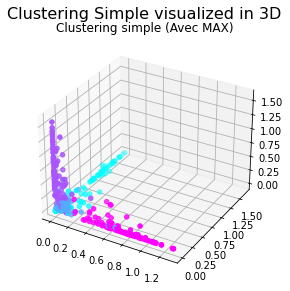

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


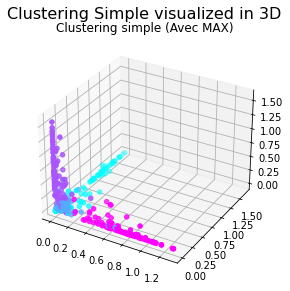

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


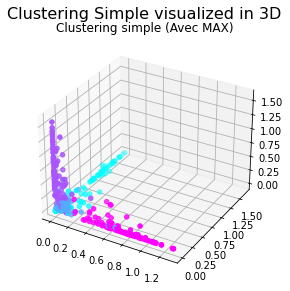

In [49]:
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_PNG)
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_JPG)
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters3D"> plot_clusters3D</a> |</strong>

<i>- 2D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


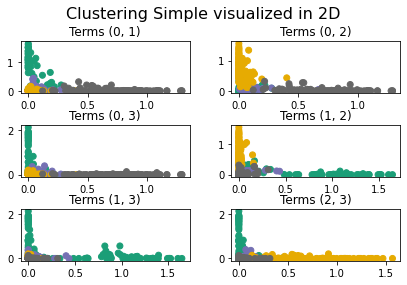

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


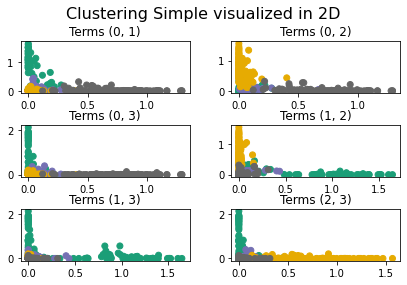

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


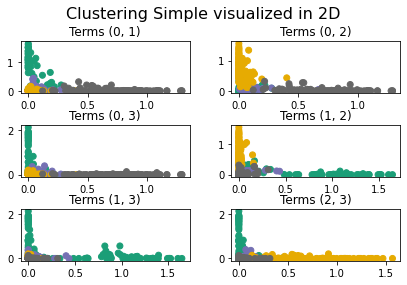

In [50]:
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_PNG)
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_JPG)
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters2D"> plot_clusters2D</a> |</strong>

<strong><font color='#5a84ba'>Question 3.b/</font></strong>

<h5>Analyse de la matrice F</h5>

{Analyse}

<strong><font color='#5a84ba'>Question 3.c/</font></strong>

Nous allons refaire la séquence (3a)-(3b)

Nous allons appliquer la contrainte d'orthogonalité seulement à la matrice F.

<h5>Orthogonal-NMF [Orthogonalité sur F seulement]</h5>

In [51]:
Reuters4_orth_NMF, absorbant, partition_orth_NMF = orth_nmf_rule(reuters4, 4, Y_orthogonality=False)

------------------- 
---- Orthogonal NMF 
------------------- 
shape data :  (400, 18933)
shape W :  (400, 4)
shape H :  (4, 18933)
---- Itération Numéro :  0
------------------- 
---- Itération Numéro :  10
------------------- 
---- Itération Numéro :  20
------------------- 
---- Itération Numéro :  30
------------------- 
---- Itération Numéro :  40
------------------- 
---- Itération Numéro :  50
------------------- 
---- Itération Numéro :  60
------------------- 
---- Itération Numéro :  70
------------------- 
---- Itération Numéro :  80
------------------- 
---- Itération Numéro :  90
------------------- 
---- Itération Numéro :  100
------------------- 
---- Itération Numéro :  110
------------------- 
---- Itération Numéro :  120
------------------- 
---- Itération Numéro :  130
------------------- 
---- Itération Numéro :  140
------------------- 
---- Itération Numéro :  150
------------------- 
---- Itération Numéro :  160
------------------- 
---- Itération Numéro :  170


<h5>Reuters4_orth_NMF</h5>

In [52]:
print_numpy_array_infos(Reuters4_orth_NMF, "Reuters4_orth_NMF")

ARRAY :  Reuters4_orth_NMF
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (18933, 4)
--- Nombre de lignes   :  18933
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  75732
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[3.31806375e-01 3.19560283e-01 2.98708645e-01 9.13273275e-01]
 [1.33695108e-01 2.79897343e+00 8.22018292e-01 7.58186368e-15]
 [4.21607645e-01 1.35692717e+00 9.91458558e-01 9.68508969e-15]
 [1.99542509e-15 1.51077593e+00 9.12137668e-15 3.54029054e+00]
 [3.25451831e-15 5.48640855e+00 2.79554943e-15 6.68459687e-01]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [53]:
pd.DataFrame(Reuters4_orth_NMF).head()

,0,1,2,3
0,3.318064e-01,0.319560,2.987086e-01,9.132733e-01
1,1.336951e-01,2.798973,8.220183e-01,7.581864e-15
2,4.216076e-01,1.356927,9.914586e-01,9.685090e-15
3,1.995425e-15,1.510776,9.121377e-15,3.540291e+00
4,3.254518e-15,5.486409,2.795549e-15,6.684597e-01


<h5>absorbant</h5>

In [54]:
print_numpy_array_infos(absorbant, "absorbant")

ARRAY :  absorbant
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 4)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  16
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [55]:
pd.DataFrame(absorbant).head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0


<h5>partition_orth_NMF</h5>

In [56]:
print_numpy_array_infos(partition_orth_NMF, "partition_orth_NMF")

ARRAY :  partition_orth_NMF
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 400)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  400
--- Nombre totale des données décrites dans le dataset :  1600
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[2.22044605e-16 2.22044605e-16 4.02713004e-04 ... 6.19547862e-02
  4.02392598e-02 1.65964647e-02]
 [7.43837723e-02 5.17905732e-03 4.01925615e-03 ... 2.22044605e-16
  2.22044605e-16 5.88477630e-03]
 [2.22044605e-16 2.22044605e-16 1.52873235e-02 ... 2.22044605e-16
  2.22044605e-16 4.47203786e-03]
 [8.68331575e-04 8.08810022e-02 3.82270233e-03 ... 2.22044605e-16
  1.19997536e-03 2.22044605e-16]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [57]:
pd.DataFrame(partition_orth_NMF).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2.220446e-16,2.220446e-16,0.000403,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,3.403292e-02,3.791569e-02,0.040036,4.717015e-02,0.021067,5.286609e-02,3.300381e-02,6.195479e-02,4.023926e-02,1.659646e-02
1,7.438377e-02,5.179057e-03,0.004019,3.352445e-02,8.071386e-02,7.995810e-02,5.264502e-02,5.750377e-02,6.717498e-02,4.987834e-03,...,1.249813e-02,2.220446e-16,0.001783,2.220446e-16,0.002257,2.220446e-16,2.461332e-04,2.220446e-16,2.220446e-16,5.884776e-03
2,2.220446e-16,2.220446e-16,0.015287,9.488820e-04,2.220446e-16,2.220446e-16,2.220446e-16,1.857846e-03,2.220446e-16,2.220446e-16,...,7.369964e-03,2.220446e-16,0.000610,2.220446e-16,0.012426,2.220446e-16,1.087496e-03,2.220446e-16,2.220446e-16,4.472038e-03
3,8.683316e-04,8.088100e-02,0.003823,3.163680e-03,2.127631e-03,5.110887e-03,1.400944e-02,1.368658e-03,5.162500e-03,8.482053e-02,...,2.220446e-16,3.801669e-04,0.001366,2.220446e-16,0.000008,2.220446e-16,2.220446e-16,2.220446e-16,1.199975e-03,2.220446e-16


Comme ce qui précéde, nous allons utiliser les appelations F et G des deux matrices **Reuters4_orth_NMF** et **partition_orth_NMF**

In [58]:
G = Reuters4_orth_NMF
F = partition_orth_NMF

In [59]:
# Enregistrement F
pd.DataFrame(F).to_csv(ORTH_NMF_F_F_ORTH, index=False)

In [60]:
# Enregistrement F
pd.DataFrame(G).to_csv(ORTH_NMF_G_F_ORTH, index=False)

In [61]:
# Enregistrement F
pd.DataFrame(absorbant).to_csv(ORTH_NMF_ABSORBANT_F_ORTH, index=False)

<h5>G</h5>

In [62]:
print_numpy_array_infos(G, "G")

ARRAY :  G
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (18933, 4)
--- Nombre de lignes   :  18933
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  75732
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[3.31806375e-01 3.19560283e-01 2.98708645e-01 9.13273275e-01]
 [1.33695108e-01 2.79897343e+00 8.22018292e-01 7.58186368e-15]
 [4.21607645e-01 1.35692717e+00 9.91458558e-01 9.68508969e-15]
 [1.99542509e-15 1.51077593e+00 9.12137668e-15 3.54029054e+00]
 [3.25451831e-15 5.48640855e+00 2.79554943e-15 6.68459687e-01]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [63]:
pd.DataFrame(G).head()

,0,1,2,3
0,3.318064e-01,0.319560,2.987086e-01,9.132733e-01
1,1.336951e-01,2.798973,8.220183e-01,7.581864e-15
2,4.216076e-01,1.356927,9.914586e-01,9.685090e-15
3,1.995425e-15,1.510776,9.121377e-15,3.540291e+00
4,3.254518e-15,5.486409,2.795549e-15,6.684597e-01


<h5>F</h5>

In [64]:
print_numpy_array_infos(F, "F")

ARRAY :  F
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 400)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  400
--- Nombre totale des données décrites dans le dataset :  1600
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[2.22044605e-16 2.22044605e-16 4.02713004e-04 ... 6.19547862e-02
  4.02392598e-02 1.65964647e-02]
 [7.43837723e-02 5.17905732e-03 4.01925615e-03 ... 2.22044605e-16
  2.22044605e-16 5.88477630e-03]
 [2.22044605e-16 2.22044605e-16 1.52873235e-02 ... 2.22044605e-16
  2.22044605e-16 4.47203786e-03]
 [8.68331575e-04 8.08810022e-02 3.82270233e-03 ... 2.22044605e-16
  1.19997536e-03 2.22044605e-16]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [65]:
pd.DataFrame(F).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2.220446e-16,2.220446e-16,0.000403,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,3.403292e-02,3.791569e-02,0.040036,4.717015e-02,0.021067,5.286609e-02,3.300381e-02,6.195479e-02,4.023926e-02,1.659646e-02
1,7.438377e-02,5.179057e-03,0.004019,3.352445e-02,8.071386e-02,7.995810e-02,5.264502e-02,5.750377e-02,6.717498e-02,4.987834e-03,...,1.249813e-02,2.220446e-16,0.001783,2.220446e-16,0.002257,2.220446e-16,2.461332e-04,2.220446e-16,2.220446e-16,5.884776e-03
2,2.220446e-16,2.220446e-16,0.015287,9.488820e-04,2.220446e-16,2.220446e-16,2.220446e-16,1.857846e-03,2.220446e-16,2.220446e-16,...,7.369964e-03,2.220446e-16,0.000610,2.220446e-16,0.012426,2.220446e-16,1.087496e-03,2.220446e-16,2.220446e-16,4.472038e-03
3,8.683316e-04,8.088100e-02,0.003823,3.163680e-03,2.127631e-03,5.110887e-03,1.400944e-02,1.368658e-03,5.162500e-03,8.482053e-02,...,2.220446e-16,3.801669e-04,0.001366,2.220446e-16,0.000008,2.220446e-16,2.220446e-16,2.220446e-16,1.199975e-03,2.220446e-16


<h5>Indices</h5>

<h6><font color='#353b38'>Indices Externes</font></h6>

<i>- Pureté</i>

In [66]:
F_index_purity = calcul_purety_index(F)

------------------------------------------------------------- 
---- Détermination des labels suivant la matrice de partition 
------------------------------------------------------------- 
--------------------------------
---- colonne :  0
---- label associé :  2
--------------------------------
---- colonne :  1
---- label associé :  4
--------------------------------
---- colonne :  2
---- label associé :  3
--------------------------------
---- colonne :  3
---- label associé :  2
--------------------------------
---- colonne :  4
---- label associé :  2
--------------------------------
---- colonne :  5
---- label associé :  2
--------------------------------
---- colonne :  6
---- label associé :  2
--------------------------------
---- colonne :  7
---- label associé :  2
--------------------------------
---- colonne :  8
---- label associé :  2
--------------------------------
---- colonne :  9
---- label associé :  4
--------------------------------
---- colonne :  10
---- labe

<strong>| Définition de la fonction <a href="#calcul_purety_index"> calcul_purety_index</a> |</strong>

In [67]:
print_numpy_array_infos(F_index_purity, "F_index_purity")

ARRAY :  F_index_purity
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (400, 1)
--- Nombre de lignes   :  400
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  400
--- Type des données :  int64


AFFICHAGE (partie) : 
 [[2]
 [4]
 [3]
 [2]
 [2]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [68]:
pd.DataFrame(F_index_purity).head()

,0
0,2
1,4
2,3
3,2
4,2


Calculons la "purity"

In [69]:
F_purity = calcul_purety(F_index_purity, labels4)

-------------------------------------- 
---- Calcul de la pureté de la matrice 
-------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_purety"> calcul_purety</a> |</strong>

In [70]:
print("---- Purity = ", F_purity)

---- Purity =  0.72


<i>- Entropy</i>

In [71]:
F_entropy = calcul_entropy(F_index_purity, labels4)

----------------------------------------------------- 
---- Calcul de l'entropie de la matrice de la matrice 
----------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]
---- entropie mpoyenne : 0.663
---- entropies des clusters : {1.0: 0.717, 2.0: 0.528, 3.0: 0.746, 4.0: 0.66}
----------------------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_entropy"> calcul_entropy</a> |</strong>

In [72]:
print("---- Entropy = ", F_entropy[0])

---- Entropy =  0.663


<h6><font color='#353b38'>Indices Internes</font></h6>

<i>- Davies&amp;Bouldin-DB</i>

In [73]:
DB_H_test = calcul_DB(np.transpose(F), labels4.reshape(-1))

------------------------------------------------------- 
---- Calcul de l'indice Davies&Bouldin-DB de la matrice 
------------------------------------------------------- 
---- DB Score :  1.1467186485511343
------------------------------------------------------- 


<i>- Calinsky&amp;Harabsz-CH</i>

In [74]:
CH_H_test = calcul_CH(np.transpose(F), labels4.reshape(-1))

--------------------------------------------------------- 
---- Calcul de l'indice Calinsky&Harabsz-CH de la matrice 
--------------------------------------------------------- 
---- DB Score :  151.39917902311336
--------------------------------------------------------- 


<i>- Krzanowski&amp;Lai-KL</i>

In [75]:
KL_test = calcul_KL(np.transpose(F), labels4)

------------------------------------------------------- 
---- Calcul de l'indice Krzanowski&Lai-KL de la matrice 
------------------------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_KL"> calcul_KL</a> |</strong>

In [76]:
print("---- Krzanowski&Lai-KL = ", KL_test)

---- Krzanowski&Lai-KL =  -21.517528404336176


<i>- Dunn</i>

In [77]:
Dunn_F = calcul_Dunn(np.transpose(F), labels4)

------------------------------------------------------- 
---- Calcul de l'indice Dunn de la matrice 
------------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]


<strong>| Définition de la fonction <a href="#calcul_Dunn"> calcul_Dunn</a> |</strong>

In [78]:
print("---- Dunn = ", Dunn_F)

---- Dunn =  0.005491793479660721


<h5>Visualisation</h5>

<i>- 3D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


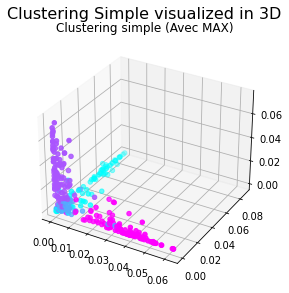

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


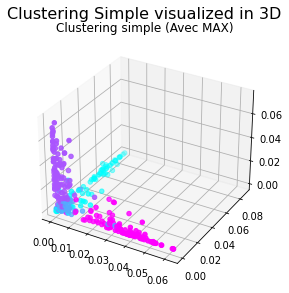

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


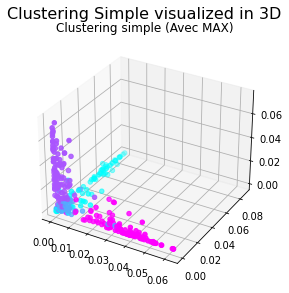

In [79]:
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_ORTH_PNG)
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_ORTH_JPG)
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_ORTH_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters3D"> plot_clusters3D</a> |</strong>

<i>- 2D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


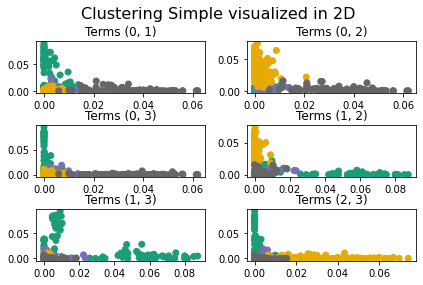

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


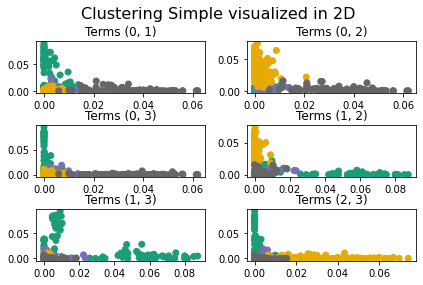

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


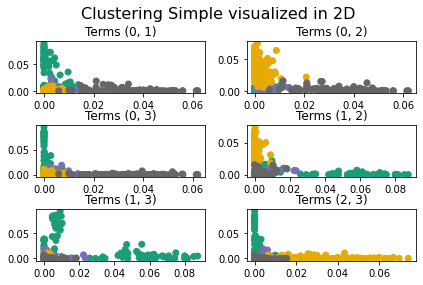

In [80]:
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_ORTH_PNG)
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_ORTH_JPG)
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_ORTH_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters2D"> plot_clusters2D</a> |</strong>

<h5>Analyse de la matrice F</h5>

{Analyse}

<strong><font color='#5a84ba'>Question 3.d/</font></strong>

Nous allons refaire la séquence (3a)-(3b)

Nous allons appliquer la contrainte d'orthogonalité seulement à la matrice G.

<h5>Orthogonal-NMF [Orthogonalité sur F seulement]</h5>

In [81]:
Reuters4_orth_NMF, absorbant, partition_orth_NMF = orth_nmf_rule(reuters4, 4, Y_orthogonality=False)

------------------- 
---- Orthogonal NMF 
------------------- 
shape data :  (400, 18933)
shape W :  (400, 4)
shape H :  (4, 18933)
---- Itération Numéro :  0
------------------- 
---- Itération Numéro :  10
------------------- 
---- Itération Numéro :  20
------------------- 
---- Itération Numéro :  30
------------------- 
---- Itération Numéro :  40
------------------- 
---- Itération Numéro :  50
------------------- 
---- Itération Numéro :  60
------------------- 
---- Itération Numéro :  70
------------------- 
---- Itération Numéro :  80
------------------- 
---- Itération Numéro :  90
------------------- 
---- Itération Numéro :  100
------------------- 
---- Itération Numéro :  110
------------------- 
---- Itération Numéro :  120
------------------- 
---- Itération Numéro :  130
------------------- 
---- Itération Numéro :  140
------------------- 
---- Itération Numéro :  150
------------------- 
---- Itération Numéro :  160
------------------- 
---- Itération Numéro :  170


<h5>Reuters4_orth_NMF</h5>

In [82]:
print_numpy_array_infos(Reuters4_orth_NMF, "Reuters4_orth_NMF")

ARRAY :  Reuters4_orth_NMF
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (18933, 4)
--- Nombre de lignes   :  18933
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  75732
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[3.31806375e-01 3.19560283e-01 2.98708645e-01 9.13273275e-01]
 [1.33695108e-01 2.79897343e+00 8.22018292e-01 7.58186368e-15]
 [4.21607645e-01 1.35692717e+00 9.91458558e-01 9.68508969e-15]
 [1.99542509e-15 1.51077593e+00 9.12137668e-15 3.54029054e+00]
 [3.25451831e-15 5.48640855e+00 2.79554943e-15 6.68459687e-01]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [83]:
pd.DataFrame(Reuters4_orth_NMF).head()

,0,1,2,3
0,3.318064e-01,0.319560,2.987086e-01,9.132733e-01
1,1.336951e-01,2.798973,8.220183e-01,7.581864e-15
2,4.216076e-01,1.356927,9.914586e-01,9.685090e-15
3,1.995425e-15,1.510776,9.121377e-15,3.540291e+00
4,3.254518e-15,5.486409,2.795549e-15,6.684597e-01


<h5>absorbant</h5>

In [84]:
print_numpy_array_infos(absorbant, "absorbant")

ARRAY :  absorbant
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 4)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  16
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [85]:
pd.DataFrame(absorbant).head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0


<h5>partition_orth_NMF</h5>

In [86]:
print_numpy_array_infos(partition_orth_NMF, "partition_orth_NMF")

ARRAY :  partition_orth_NMF
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 400)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  400
--- Nombre totale des données décrites dans le dataset :  1600
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[2.22044605e-16 2.22044605e-16 4.02713004e-04 ... 6.19547862e-02
  4.02392598e-02 1.65964647e-02]
 [7.43837723e-02 5.17905732e-03 4.01925615e-03 ... 2.22044605e-16
  2.22044605e-16 5.88477630e-03]
 [2.22044605e-16 2.22044605e-16 1.52873235e-02 ... 2.22044605e-16
  2.22044605e-16 4.47203786e-03]
 [8.68331575e-04 8.08810022e-02 3.82270233e-03 ... 2.22044605e-16
  1.19997536e-03 2.22044605e-16]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [87]:
pd.DataFrame(partition_orth_NMF).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2.220446e-16,2.220446e-16,0.000403,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,3.403292e-02,3.791569e-02,0.040036,4.717015e-02,0.021067,5.286609e-02,3.300381e-02,6.195479e-02,4.023926e-02,1.659646e-02
1,7.438377e-02,5.179057e-03,0.004019,3.352445e-02,8.071386e-02,7.995810e-02,5.264502e-02,5.750377e-02,6.717498e-02,4.987834e-03,...,1.249813e-02,2.220446e-16,0.001783,2.220446e-16,0.002257,2.220446e-16,2.461332e-04,2.220446e-16,2.220446e-16,5.884776e-03
2,2.220446e-16,2.220446e-16,0.015287,9.488820e-04,2.220446e-16,2.220446e-16,2.220446e-16,1.857846e-03,2.220446e-16,2.220446e-16,...,7.369964e-03,2.220446e-16,0.000610,2.220446e-16,0.012426,2.220446e-16,1.087496e-03,2.220446e-16,2.220446e-16,4.472038e-03
3,8.683316e-04,8.088100e-02,0.003823,3.163680e-03,2.127631e-03,5.110887e-03,1.400944e-02,1.368658e-03,5.162500e-03,8.482053e-02,...,2.220446e-16,3.801669e-04,0.001366,2.220446e-16,0.000008,2.220446e-16,2.220446e-16,2.220446e-16,1.199975e-03,2.220446e-16


Comme ce qui précéde, nous allons utiliser les appelations F et G des deux matrices **Reuters4_orth_NMF** et **partition_orth_NMF**

In [88]:
G = Reuters4_orth_NMF
F = partition_orth_NMF

In [89]:
# Enregistrement F
pd.DataFrame(F).to_csv(ORTH_NMF_F_G_ORTH, index=False)

In [90]:
# Enregistrement F
pd.DataFrame(G).to_csv(ORTH_NMF_G_G_ORTH, index=False)

In [91]:
# Enregistrement F
pd.DataFrame(absorbant).to_csv(ORTH_NMF_ABSORBANT_G_ORTH, index=False)

<h5>G</h5>

In [92]:
print_numpy_array_infos(G, "G")

ARRAY :  G
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (18933, 4)
--- Nombre de lignes   :  18933
--- Nombre de colonnes :  4
--- Nombre totale des données décrites dans le dataset :  75732
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[3.31806375e-01 3.19560283e-01 2.98708645e-01 9.13273275e-01]
 [1.33695108e-01 2.79897343e+00 8.22018292e-01 7.58186368e-15]
 [4.21607645e-01 1.35692717e+00 9.91458558e-01 9.68508969e-15]
 [1.99542509e-15 1.51077593e+00 9.12137668e-15 3.54029054e+00]
 [3.25451831e-15 5.48640855e+00 2.79554943e-15 6.68459687e-01]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [93]:
pd.DataFrame(G).head()

,0,1,2,3
0,3.318064e-01,0.319560,2.987086e-01,9.132733e-01
1,1.336951e-01,2.798973,8.220183e-01,7.581864e-15
2,4.216076e-01,1.356927,9.914586e-01,9.685090e-15
3,1.995425e-15,1.510776,9.121377e-15,3.540291e+00
4,3.254518e-15,5.486409,2.795549e-15,6.684597e-01


<h5>F</h5>

In [94]:
print_numpy_array_infos(F, "F")

ARRAY :  F
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 400)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  400
--- Nombre totale des données décrites dans le dataset :  1600
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[2.22044605e-16 2.22044605e-16 4.02713004e-04 ... 6.19547862e-02
  4.02392598e-02 1.65964647e-02]
 [7.43837723e-02 5.17905732e-03 4.01925615e-03 ... 2.22044605e-16
  2.22044605e-16 5.88477630e-03]
 [2.22044605e-16 2.22044605e-16 1.52873235e-02 ... 2.22044605e-16
  2.22044605e-16 4.47203786e-03]
 [8.68331575e-04 8.08810022e-02 3.82270233e-03 ... 2.22044605e-16
  1.19997536e-03 2.22044605e-16]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [95]:
pd.DataFrame(F).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2.220446e-16,2.220446e-16,0.000403,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,3.403292e-02,3.791569e-02,0.040036,4.717015e-02,0.021067,5.286609e-02,3.300381e-02,6.195479e-02,4.023926e-02,1.659646e-02
1,7.438377e-02,5.179057e-03,0.004019,3.352445e-02,8.071386e-02,7.995810e-02,5.264502e-02,5.750377e-02,6.717498e-02,4.987834e-03,...,1.249813e-02,2.220446e-16,0.001783,2.220446e-16,0.002257,2.220446e-16,2.461332e-04,2.220446e-16,2.220446e-16,5.884776e-03
2,2.220446e-16,2.220446e-16,0.015287,9.488820e-04,2.220446e-16,2.220446e-16,2.220446e-16,1.857846e-03,2.220446e-16,2.220446e-16,...,7.369964e-03,2.220446e-16,0.000610,2.220446e-16,0.012426,2.220446e-16,1.087496e-03,2.220446e-16,2.220446e-16,4.472038e-03
3,8.683316e-04,8.088100e-02,0.003823,3.163680e-03,2.127631e-03,5.110887e-03,1.400944e-02,1.368658e-03,5.162500e-03,8.482053e-02,...,2.220446e-16,3.801669e-04,0.001366,2.220446e-16,0.000008,2.220446e-16,2.220446e-16,2.220446e-16,1.199975e-03,2.220446e-16


<h5>Indices</h5>

<h6><font color='#353b38'>Indices Externes</font></h6>

<i>- Pureté</i>

In [96]:
F_index_purity = calcul_purety_index(F)

------------------------------------------------------------- 
---- Détermination des labels suivant la matrice de partition 
------------------------------------------------------------- 
--------------------------------
---- colonne :  0
---- label associé :  2
--------------------------------
---- colonne :  1
---- label associé :  4
--------------------------------
---- colonne :  2
---- label associé :  3
--------------------------------
---- colonne :  3
---- label associé :  2
--------------------------------
---- colonne :  4
---- label associé :  2
--------------------------------
---- colonne :  5
---- label associé :  2
--------------------------------
---- colonne :  6
---- label associé :  2
--------------------------------
---- colonne :  7
---- label associé :  2
--------------------------------
---- colonne :  8
---- label associé :  2
--------------------------------
---- colonne :  9
---- label associé :  4
--------------------------------
---- colonne :  10
---- labe

---- colonne :  128
---- label associé :  2
--------------------------------
---- colonne :  129
---- label associé :  1
--------------------------------
---- colonne :  130
---- label associé :  3
--------------------------------
---- colonne :  131
---- label associé :  1
--------------------------------
---- colonne :  132
---- label associé :  3
--------------------------------
---- colonne :  133
---- label associé :  3
--------------------------------
---- colonne :  134
---- label associé :  4
--------------------------------
---- colonne :  135
---- label associé :  1
--------------------------------
---- colonne :  136
---- label associé :  1
--------------------------------
---- colonne :  137
---- label associé :  2
--------------------------------
---- colonne :  138
---- label associé :  2
--------------------------------
---- colonne :  139
---- label associé :  1
--------------------------------
---- colonne :  140
---- label associé :  4
--------------------------------

<strong>| Définition de la fonction <a href="#calcul_purety_index"> calcul_purety_index</a> |</strong>

In [97]:
print_numpy_array_infos(F_index_purity, "F_index_purity")

ARRAY :  F_index_purity
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (400, 1)
--- Nombre de lignes   :  400
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  400
--- Type des données :  int64


AFFICHAGE (partie) : 
 [[2]
 [4]
 [3]
 [2]
 [2]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [98]:
pd.DataFrame(F_index_purity).head()

,0
0,2
1,4
2,3
3,2
4,2


Calculons la "purity"

In [99]:
F_purity = calcul_purety(F_index_purity, labels4)

-------------------------------------- 
---- Calcul de la pureté de la matrice 
-------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_purety"> calcul_purety</a> |</strong>

In [100]:
print("---- Purity = ", F_purity)

---- Purity =  0.72


<i>- Entropy</i>

In [101]:
F_entropy = calcul_entropy(F_index_purity, labels4)

----------------------------------------------------- 
---- Calcul de l'entropie de la matrice de la matrice 
----------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]
---- entropie mpoyenne : 0.663
---- entropies des clusters : {1.0: 0.717, 2.0: 0.528, 3.0: 0.746, 4.0: 0.66}
----------------------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_entropy"> calcul_entropy</a> |</strong>

<h6><font color='#353b38'>Indices Internes</font></h6>

In [102]:
print("---- Entropy = ", F_entropy[0])

---- Entropy =  0.663


<i>- Davies&amp;Bouldin-DB</i>

In [103]:
DB_H_test = calcul_DB(np.transpose(F), labels4.reshape(-1))

------------------------------------------------------- 
---- Calcul de l'indice Davies&Bouldin-DB de la matrice 
------------------------------------------------------- 
---- DB Score :  1.1467186485511343
------------------------------------------------------- 


<i>- Calinsky&amp;Harabsz-CH</i>

In [104]:
CH_H_test = calcul_CH(np.transpose(F), labels4.reshape(-1))

--------------------------------------------------------- 
---- Calcul de l'indice Calinsky&Harabsz-CH de la matrice 
--------------------------------------------------------- 
---- DB Score :  151.39917902311336
--------------------------------------------------------- 


<i>- Krzanowski&amp;Lai-KL</i>

In [105]:
KL_test = calcul_KL(np.transpose(F), labels4)

------------------------------------------------------- 
---- Calcul de l'indice Krzanowski&Lai-KL de la matrice 
------------------------------------------------------- 


<i>- Dunn</i>

In [106]:
Dunn_F = calcul_Dunn(np.transpose(F), labels4)

------------------------------------------------------- 
---- Calcul de l'indice Dunn de la matrice 
------------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]


<strong>| Définition de la fonction <a href="#calcul_Dunn"> calcul_Dunn</a> |</strong>

In [107]:
print("---- Dunn = ", Dunn_F)

---- Dunn =  0.005491793479660721


<h5>Visualisation</h5>

<i>- 3D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


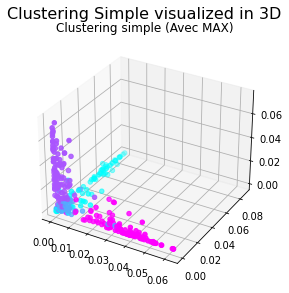

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


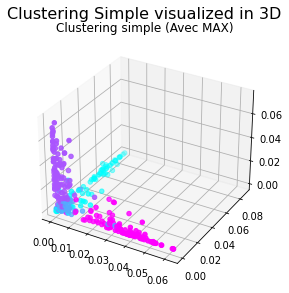

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


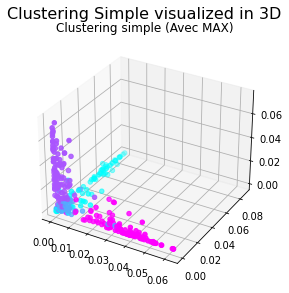

In [108]:
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_G_ORTH_PNG)
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_G_ORTH_JPG)
plot_clusters3D(np.transpose(F), labels4, V_ORTH_NMF_3D_F_G_ORTH_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters3D"> plot_clusters3D</a> |</strong>

<i>- 2D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


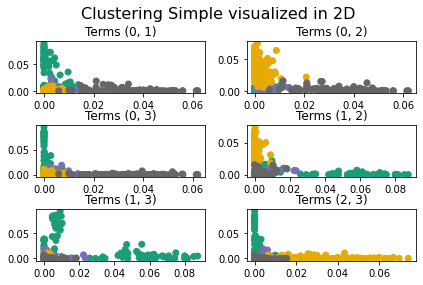

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


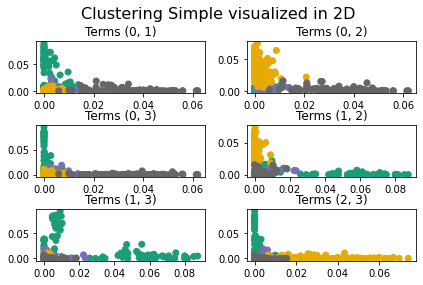

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


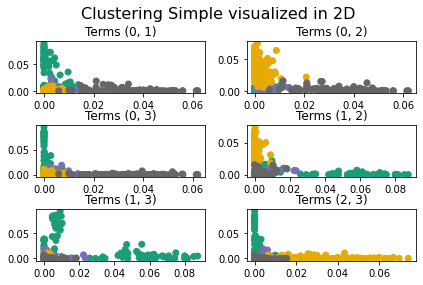

In [109]:
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_G_ORTH_PNG)
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_G_ORTH_JPG)
plot_clusters2D(np.transpose(F), labels4, V_ORTH_NMF_2D_F_G_ORTH_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters2D"> plot_clusters2D</a> |</strong>

<h5>Analyse de la matrice F</h5>

{Analyse}

<hr>
<div style="display: flex;">
    <div style="margin: 10px;"><strong><a href="./IV-NMF.ipynb">précédent</a></strong></div>
    <div style="margin: 10px;"><strong><a href="./VI-Symmetric NMF.ipynb">suivant</a></strong></div>
</div>